In [1]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import multiprocessing

print(multiprocessing.cpu_count())

16


In [2]:
# grid
grid = al.Grid2D.uniform(
    shape_native=(50, 50),
    pixel_scales=0.05,
)

# lens

BCG_mass = af.Model(al.mp.NFW)
BCG_mass.centre_0 = 0.0
BCG_mass.centre_1 = 0.0
BCG = af.Model(al.Galaxy, redshift=0.338, mass=BCG_mass)

P1_mass = af.Model(al.mp.NFW)
P1_mass.centre_0 = 0.87
P1_mass.centre_1 = -16.42
P1 = af.Model(al.Galaxy, redshift=0.338, mass=P1_mass)

P2_mass = af.Model(al.mp.NFW)
P2_mass.centre_0 = -19.15
P2_mass.centre_1 = -13.37
P2 = af.Model(al.Galaxy, redshift=0.338, mass=P2_mass)

P3_mass = af.Model(al.mp.NFW)
P3_mass.centre_0 = 5.12
P3_mass.centre_1 = 7.07
P3 = af.Model(al.Galaxy, redshift=0.338, mass=P3_mass)

lens_sys = af.Collection(lens_0=BCG, lens_1=P1,lens_2=P2, lens_3=P3)

#sources - image plane - https://pyautolens.readthedocs.io/en/latest/overview/overview_8_point_sources.html

point_ds_H = al.PointDataset(
                name='H',
                positions=al.Grid2DIrregular([[-19.38, -1.74], [-8.33, -15.74], [2.37, -17.23], [6.37, 7.87]]),
                positions_noise_map=al.ArrayIrregular([0.05, 0.05, 0.05, 0.05]),
                )

point_ds_SN = al.PointDataset(
                name='SN',
                positions=al.Grid2DIrregular([[-1.93, -18.49], [-11.30, -15.32], [-18.80, -6.52]]),
                positions_noise_map=al.ArrayIrregular([0.05, 0.05, 0.05]),
                )

point_ds_3 = al.PointDataset(
                name='s3',
                positions=al.Grid2DIrregular([[4.22, 7.38], [-2.00, 8.60], [9.13, -3.22], [-3.41, -2.06]]),
                positions_noise_map=al.ArrayIrregular([0.05, 0.05, 0.05, 0.05]),
                )

point_dict = al.PointDict(point_dataset_list=[point_ds_H, point_ds_SN, point_ds_3])

# print(point_dict)

#sources - source plane

source_0 = af.Model(al.Galaxy, redshift=1.95, H=af.Model(al.ps.PointSourceChi))

source_1 = af.Model(al.Galaxy, redshift=1.95, SN=af.Model(al.ps.PointSourceChi))

source_2 = af.Model(al.Galaxy, redshift=0.7663, s3=af.Model(al.ps.PointSourceChi))

source_sys = af.Collection(source_0=source_0, source_1=source_1, source_2=source_2)

clusters = lens_sys + source_sys

model = af.Collection(galaxies=clusters)

print(model.info)

Total Free Parameters = 22

model                                                                           Collection (N=22)
    galaxies                                                                    Collection (N=22)
        lens_0                                                                  Galaxy (N=4)
            mass                                                                NFW (N=4)
        lens_1                                                                  Galaxy (N=4)
            mass                                                                NFW (N=4)
        lens_2                                                                  Galaxy (N=4)
            mass                                                                NFW (N=4)
        lens_3                                                                  Galaxy (N=4)
            mass                                                                NFW (N=4)
        source_0                            

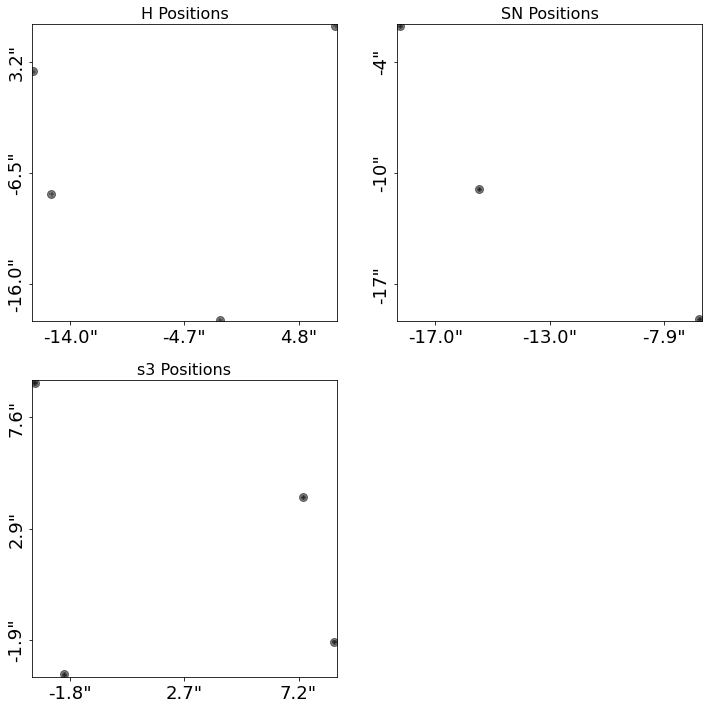

In [3]:
point_dict_plotter = aplt.PointDictPlotter(point_dict=point_dict)
point_dict_plotter.subplot_positions()

In [4]:
# fitting

solver = al.PointSolver(
    grid=grid,
    pixel_scale_precision=0.001,
#     upscale_factor=2,
)

print(grid.pixel_scale)

analysis = al.AnalysisPoint(point_dict=point_dict, solver=solver)

run_time_dict, info_dict = analysis.profile_log_likelihood_function(
    instance=model.random_instance()
)

print(f"Log Likelihood Evaluation Time (second) = {run_time_dict['fit_time']}")

search = af.DynestyStatic(name="point_sourceChi_01", number_of_cores=1)

result = search.fit(model=model, analysis=analysis)

0.05
Log Likelihood Evaluation Time (second) = 0.024999618530273438
2023-09-17 21:56:36,569 - autofit.non_linear.abstract_search - INFO - Creating search
2023-09-17 21:56:36,571 - root - INFO - Starting search
2023-09-17 21:56:36,573 - root - INFO - Saving path info
2023-09-17 21:56:36,573 - root - INFO - Not complete. Starting non-linear search.
2023-09-17 21:56:36,575 - root - INFO - No Dynesty samples found, beginning new non-linear search. 
2023-09-17 21:56:36,643 - autofit.non_linear.initializer - INFO - Generating initial samples of model, which are subject to prior limits and other constraints.


836it [01:39,  8.40it/s, +50 | bound: 90 | nc: 1 | ncall: 5103 | eff(%): 17.534 | loglstar:   -inf < -16393.084 <    inf | logz: -16414.496 +/-  0.608 | dlogz:  1.099 >  0.059]


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Dhruv\\AppData\\Local\\Temp\\tmp3gq0e4ol\\savestate.save.tmp' -> 'C:\\Users\\Dhruv\\AppData\\Local\\Temp\\tmp3gq0e4ol\\savestate.save'